# Проект: Исследование бронирования билетов на сервисе Яндекс Афиша

- Автор: Елагина Ксения

## Введение

### Цели и задачи проекта
Необходимо провести исследовательский анализ сервиса Яндекс Афиша и выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.

Задачи:
- Загрузить данные и познакомиться с ними.
- Предобработать данные и подготовить их к исследованию:
  - Провести преобразование типов данных, если необходимо.
  - Проверить данные на пропуски.
  - Изучить значения в ключевых столбцах и при обнаружении ошибок обработать их.
  - Проверить данные на явные и неявные дубликаты.
  - Создать новые столбцы для дальнейшего анализа.
- Провести исследовательский анализ данных:
  - Проанализировать распределения заказов по сегментам и их сезонные изменения.
  - Проанализировать активность пользователей осенью 2024 года.
  - Провести анализ распределения событий по регионам и партнёрам.
  - Проверить две гипотезы:
    1. Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
    2. Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
- Сделать выводы и рекомендации.

### Описание данных

##### Таблица `final_tickets_orders_df.csv` содержит информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных:
- order_id — уникальный идентификатор заказа.
- user_id — уникальный идентификатор пользователя.
- created_dt_msk — дата создания заказа (московское время).
- created_ts_msk — дата и время создания заказа (московское время).
- event_id — идентификатор мероприятия из таблицы events.
- cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- age_limit — возрастное ограничение мероприятия.
- currency_code — валюта оплаты, например rub для российских рублей.
- device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
- revenue — выручка от заказа.
- service_name — название билетного оператора.
- tickets_count — количество купленных билетов.
- total — общая сумма заказа.
- days_since_prev - количество дней с предыдущей покупки для каждого пользователя.

##### Таблица `final_tickets_events_df.csv` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия:
- event_id — уникальный идентификатор мероприятия.
- event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- event_type_description — описание типа мероприятия.
- event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.
- organizers — организаторы мероприятия.
- region_name — название региона.
- city_name — название города.
- venue_id — уникальный идентификатор площадки.
- venue_name — название площадки.
- venue_address — адрес площадки.

##### Таблица `final_tickets_tenge_df.csv` содержит информацию о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:
- nominal — номинал (100 тенге).
- data — дата.
- curs — курс тенге к рублю.
- cdx — обозначение валюты (kzt).


## Знакомство с данными: загрузка и первичная предобработка

### Вывод общей информации


In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro

In [2]:
# Выгружаем данные
final_tickets_orders_df = pd.read_csv('/datasets/final_tickets_orders_df.csv')
final_tickets_events_df = pd.read_csv('t/datasets/final_tickets_events_df.csv')
final_tickets_tenge_df = pd.read_csv('/datasets/final_tickets_tenge_df.csv')

Рассмотрим датафрейм с информацией о заказах билетов `final_tickets_orders_df.csv`.

In [3]:
# Выведем первые 5 строчек датафрейма:
final_tickets_orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
# Выведем информацию о датафрейме:
final_tickets_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [5]:
# Проверим количество пропусков в столбце:
final_tickets_orders_df['days_since_prev'].isna().sum()

21940

Датасет `final_tickets_orders_df.csv` содержит 14 столбцов и 290849 строк, в которых представлена информация обо всех заказах билетов.

После первичного анализа данных можно сделать следующие выводы:
- Пропуски присутствуют в столбце `days_since_prev` у 21940 строчек. Следовательно, 21940 пользователей совершили только 1 заказ в сервисе.
- Столбцы `created_dt_msk`, `created_ts_msk` имеют тип данных object, но содержат в себе данные о дате и времени. Необходимо заменить тип данных на datetime.
- Столбец `days_since_prev` лучше привести к типу данных int, т.к. он содержит информацию о количестве дней.
- У числовых столбцов можно уменьшить разрядность.

Теперь познакомимся с данными датасета `final_tickets_events_df.csv`.

In [6]:
# Выведем первые 5 строчек датафрейма:
final_tickets_events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [7]:
# Выведем информацию о датафрейме:
final_tickets_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Датасет `final_tickets_events_df.csv` содержит 11 столбцов и 22427 строк, в которых представлена информация о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.

После первичного анализа данных можно сделать следующие выводы:
- Данные полные, имена столбцов и типы данных соответствуют необходимым.
- У числовых столбцов можно уменьшить разрядность.

Познакомимся с данными датасета `final_tickets_tenge_df.csv`.

In [8]:
# Выведем первые 5 строчек датафрейма:
final_tickets_tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [9]:
# Выведем информацию о датафрейме:
final_tickets_tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Датасет `final_tickets_tenge_df.csv` содержит 4 столбца и 357 строк, в которых представлена информация о курсе тенге к российскому рублю за 2024 год.

После первичного анализа данных можно сделать следующие выводы:
- Столбец `data` из типа object необходимо привести к типу datetime.
- У числовых столбцов можно уменьшить разрядность.

### Предобработка данных

Перед предобработкой данных объединим таблицы.

In [10]:
# Объединим датафреймы
df = final_tickets_orders_df.merge(final_tickets_events_df, how='left', on='event_id')

- проверка и замена типов данных


In [11]:
# Выведем столбцы с неверными типами данных:
df[['created_dt_msk', 'created_ts_msk', 'days_since_prev']].dtypes

created_dt_msk      object
created_ts_msk      object
days_since_prev    float64
dtype: object

In [12]:
final_tickets_tenge_df[['data']].dtypes

data    object
dtype: object

In [13]:
def convert_to_datetime(df, col_names):
    '''
    Функция приводит указанные столбцы датафрейма к типу datetime.
    
    '''
    for col in col_names:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

In [14]:
# Обработаем типы данных в столбцах, которые хранят значения даты и времени:
df = convert_to_datetime(df, ['created_dt_msk', 'created_ts_msk'])

In [15]:
# Переведем тип данных в целочисленный:
df['days_since_prev'] = df['days_since_prev'].astype('Int64')

In [16]:
# Проверим правильность преобразования:
df[['created_dt_msk', 'created_ts_msk', 'days_since_prev']].dtypes

created_dt_msk     datetime64[ns]
created_ts_msk     datetime64[ns]
days_since_prev             Int64
dtype: object

In [17]:
# Преобразуем тип данных в другой таблице:
final_tickets_tenge_df = convert_to_datetime(final_tickets_tenge_df,['data'])

In [18]:
# Проверим правильность преобразования:
final_tickets_tenge_df['data'].dtype

dtype('<M8[ns]')

Напишем функцию для уменьшения разрядов типов данных.

In [19]:
def optimize_df_types(df: pd.DataFrame) -> pd.DataFrame:
    """
    Уменьшает разрядность числовых типов данных (int и float) в датафрейме.
    Если в int-колонке есть NaN — использует Pandas' Int* типы (nullable).
    
    """
    df_optimized = df.copy()

    for col in df_optimized.columns:
        col_data = df_optimized[col]
        has_na = col_data.isna().any()

        if pd.api.types.is_integer_dtype(col_data):
            if not has_na:
                df_optimized[col] = pd.to_numeric(col_data, downcast='integer')
            else:
                min_val, max_val = col_data.min(), col_data.max()
                if min_val >= np.iinfo(np.int8).min and max_val <= np.iinfo(np.int8).max:
                    df_optimized[col] = col_data.astype("Int8")
                elif min_val >= np.iinfo(np.int16).min and max_val <= np.iinfo(np.int16).max:
                    df_optimized[col] = col_data.astype("Int16")
                else:
                    df_optimized[col] = col_data.astype("Int32")

        elif pd.api.types.is_float_dtype(col_data):
            # Проверка: можно ли привести к Int* (все значения целые или NaN)
            if ((col_data.dropna() % 1) == 0).all():
                min_val, max_val = col_data.min(), col_data.max()
                if min_val >= np.iinfo(np.int8).min and max_val <= np.iinfo(np.int8).max:
                    df_optimized[col] = col_data.astype("Int8")
                elif min_val >= np.iinfo(np.int16).min and max_val <= np.iinfo(np.int16).max:
                    df_optimized[col] = col_data.astype("Int16")
                else:
                    df_optimized[col] = col_data.astype("Int32")
            else:
                # обычный float
                df_optimized[col] = pd.to_numeric(col_data, downcast='float')

    return df_optimized

In [20]:
# Применим функцию к датафреймам:
df = optimize_df_types(df)
final_tickets_tenge_df = optimize_df_types(final_tickets_tenge_df)

In [21]:
# Проверим правильность преобразования:
df.dtypes

order_id                           int32
user_id                           object
created_dt_msk            datetime64[ns]
created_ts_msk            datetime64[ns]
event_id                           int32
cinema_circuit                    object
age_limit                           int8
currency_code                     object
device_type_canonical             object
revenue                          float32
service_name                      object
tickets_count                       int8
total                            float32
days_since_prev                    Int16
event_name                        object
event_type_description            object
event_type_main                   object
organizers                        object
region_name                       object
city_name                         object
city_id                            Int32
venue_id                           Int16
venue_name                        object
venue_address                     object
dtype: object

In [22]:
# Проверим правильность преобразования:
final_tickets_tenge_df.dtypes

data       datetime64[ns]
nominal              int8
curs              float32
cdx                object
dtype: object

- изучение значений в ключевых столбцах:

In [23]:
# Посмотрим на значения в столбце age_limit:
df['age_limit'].unique()

array([16,  0, 18, 12,  6], dtype=int8)

In [24]:
# Посмотрим на значения в столбце service_name:
df['service_name'].unique()

array(['Край билетов', 'Мой билет', 'За билетом!', 'Лови билет!',
       'Билеты без проблем', 'Облачко', 'Лучшие билеты', 'Прачечная',
       'Быстробилет', 'Дом культуры', 'Весь в билетах', 'Билеты в руки',
       'Тебе билет!', 'Show_ticket', 'Городской дом культуры', 'Яблоко',
       'Билет по телефону', 'Выступления.ру', 'Росбилет',
       'Шоу начинается!', 'Мир касс', 'Восьмёрка', 'Телебилет',
       'Crazy ticket!', 'Реестр', 'Быстрый кассир', 'КарандашРУ',
       'Радио ticket', 'Дырокол', 'Вперёд!', 'Кино билет', 'Цвет и билет',
       'Зе Бест!', 'Тех билет', 'Лимоны', 'Билеты в интернете'],
      dtype=object)

In [25]:
# Посмотрим на значения в столбце event_type_main:
df['event_type_main'].unique()

array(['театр', 'выставки', 'другое', 'стендап', 'концерты', 'спорт', nan,
       'ёлки'], dtype=object)

In [26]:
# Посмотрим на значения в столбце cinema_circuit:
df['cinema_circuit'].unique()

array(['нет', 'Другое', 'Киномакс', 'КиноСити', 'Москино', 'ЦентрФильм'],
      dtype=object)

In [27]:
# Посмотрим на значения в столбце currency_code:
df['currency_code'].unique()

array(['rub', 'kzt'], dtype=object)

In [28]:
# Посмотрим на значения в столбце device_type_canonical:
df['device_type_canonical'].unique()

array(['mobile', 'desktop'], dtype=object)

In [29]:
# Посмотрим на значения в столбце event_type_description:
df['event_type_description'].unique()

array(['спектакль', 'событие', 'цирковое шоу', 'выставка', 'шоу',
       'концерт', 'спорт', 'мюзикл', 'фестиваль', nan, 'ёлка', 'балет',
       'спортивное мероприятие', 'опера', 'музыкальный спектакль',
       'кукольный спектакль', 'оперетта', 'снегурочка', 'рок-мюзикл',
       'экскурсия', 'подарок'], dtype=object)

В столбцах `event_type_main`, `event_type_description`, `region_name`, `city_name`, `venue_name` и `venue_address` найдены пропуски. Не будем их удалять, иначе придется избавиться от необходимых для анализа данных. 

В столбце `cinema_circuit` присутствует значение "нет", т.к. в датасете представлены различные события, а не только кинотеатры.

Посмотрим на распределение и разброс количественных значений в данных. Но перед этим разделим датасет на два отдельных по валюте.

In [34]:
# Создадим отдельные датасеты:
df_rub = df[df['currency_code'] == 'rub'].copy()
df_kzt = df[df['currency_code'] == 'kzt'].copy()

In [35]:
# Выведем описание статистики revenue:
df_rub['revenue'].describe(percentiles=[0.01,0.25,0.75,0.99])

count    285780.000000
mean        547.568359
std         871.524536
min         -90.760002
1%            0.000000
25%         113.827501
50%         346.100006
75%         791.700012
99%        2569.594292
max       81174.539062
Name: revenue, dtype: float64

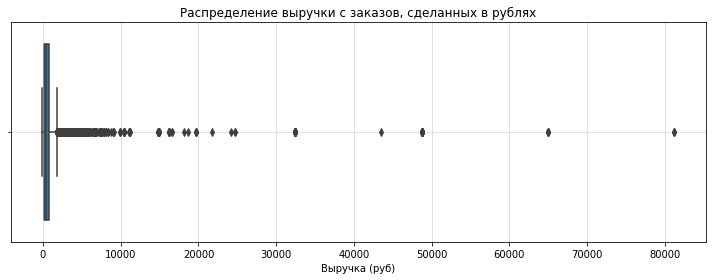

In [36]:
# Построим диаграмму размаха:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_rub, x='revenue')
plt.title('Распределение выручки с заказов, сделанных в рублях')
plt.xlabel('Выручка (руб)')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

У данных большое количество выбросов. 99 перцентиль равняется 2570 рублей, когда как максимальное значение - 81175 руб. Также минимальное значение принимает отрицательное значение. Вероятно, в данные попала информация о возвратах.

Для дальнейшего анализа необходимо исключить выбросы.

In [37]:
# Удалим значения до 1 перцентиля и после 99:
df_rub = df_rub.loc[(df_rub['revenue']>df_rub['revenue'].quantile(0.01))&(df_rub['revenue']<df_rub['revenue'].quantile(0.99))]

In [38]:
# Выведем описание статистики tickets_count:
df_rub['tickets_count'].describe(percentiles=[0.01,0.25,0.75,0.99])

count    276810.000000
mean          2.743474
std           1.157536
min           1.000000
1%            1.000000
25%           2.000000
50%           3.000000
75%           3.000000
99%           6.000000
max          47.000000
Name: tickets_count, dtype: float64

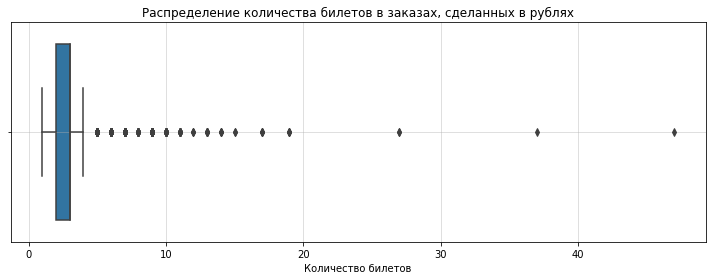

In [39]:
# Построим диаграмму размаха:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_rub, x='tickets_count')
plt.title('Распределение количества билетов в заказах, сделанных в рублях')
plt.xlabel('Количество билетов')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

Так как 99 перцентиль составляет 6 билетов в одном заказе, а максимальное значение равняется 47, то удалим выбросы после 99%.

In [40]:
# Удалим значения после 99 перцентиля:
df_rub = df_rub.loc[df_rub['tickets_count']<df_rub['tickets_count'].quantile(0.99)]

Проведем тот же анализ над данными с тенге.

In [41]:
# Выведем описание статистики revenue:
df_kzt['revenue'].describe(percentiles=[0.01,0.25,0.75,0.99])

count     5069.000000
mean      4995.207031
std       4916.752930
min          0.000000
1%          90.269997
25%        518.099976
50%       3698.830078
75%       7397.660156
99%      17617.240234
max      26425.859375
Name: revenue, dtype: float64

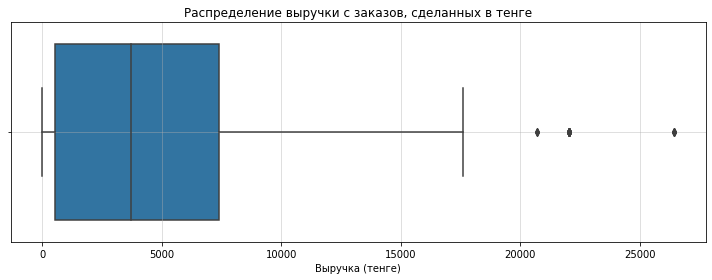

In [42]:
# Построим диаграмму размаха:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_kzt, x='revenue')
plt.title('Распределение выручки с заказов, сделанных в тенге')
plt.xlabel('Выручка (тенге)')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

In [43]:
# Удалим значения после 99 перцентиля:
df_kzt = df_kzt.loc[df_kzt['revenue']<df_kzt['revenue'].quantile(0.99)]

In [44]:
# Выведем описание статистики tickets_count:
df_kzt['tickets_count'].describe(percentiles=[0.01,0.25,0.75,0.99])

count    4844.000000
mean        2.697770
std         1.094119
min         1.000000
1%          1.000000
25%         2.000000
50%         3.000000
75%         3.000000
99%         6.000000
max         6.000000
Name: tickets_count, dtype: float64

Данные нормально распределены, оставим их так.

In [45]:
# Соединим обратно датафреймы:
df_all = pd.concat([df_rub, df_kzt], ignore_index=True)

В столбце с выручкой в рублях были найдены и удалены аномально высокие значения, а также отрицательные (вероятно, эти данные являются возвратами и случайно попали в датасет). Также удалили выбросы из данных о количестве билетов в заказах, которые превышали 99 перцентиль.

Из столбца с выручкой в тенге удалили данные выше 99%. В данных о количестве билетов в заказах выбросов не оказалось.

- работа с дубликатами:

In [46]:
# Проверим датафреймы на наличие явных дубликатов:
print(df_all.duplicated().sum())
print(final_tickets_tenge_df.duplicated().sum())

0
0


In [47]:
# Проверим датафрейм на наличие неявных дубликатов:
df_all.drop(columns=['order_id']).duplicated().sum()


29

В датафрейме 29 неявных дубликатов. Они могут исказить данные, поэтому их следует удалить.

In [48]:
# Удалим неявные дубликаты
df_clear = df_all[~df_all.drop(columns=['order_id']).duplicated()]

# Проверим успешность удаления:
df_clear.drop(columns=['order_id']).duplicated().sum()

0

- создадим несколько новых столбцов

Сначала добавим столбец с курсом тенге для перевода в рубли.

In [49]:
# Создадим отдельные датасеты:
df_clear_rub = df_clear[df_clear['currency_code'] == 'rub']
df_clear_kzt = df_clear[df_clear['currency_code'] == 'kzt']

In [50]:
# Соединим таблицы и добавим столбец с курсом для тенге:
df_clear_kzt = df_clear_kzt.merge(
    final_tickets_tenge_df[['data', 'curs']],
    how='left',
    left_on='created_dt_msk',
    right_on='data'
).drop(columns='data')


In [51]:
# Соединим таблицы обратно:
full_df = pd.concat([df_clear_rub, df_clear_kzt], ignore_index=True)

In [52]:
# Создадим столбец revenue_rub:
full_df['revenue_rub'] = full_df['revenue']

# Изменим значения на верные:
full_df.loc[full_df['currency_code'] == 'kzt', 'revenue_rub'] = (
    full_df['revenue']*full_df['curs']/100
)

In [53]:
# Добавим столбец выручки с продажи одного билета на мероприятие:
full_df['one_ticket_revenue_rub'] = full_df['revenue_rub']/full_df['tickets_count']

In [54]:
# Добавим столбец месяца оформления заказа:
full_df['month'] = full_df['created_dt_msk'].dt.month

In [55]:
# Добавим столбец с информацией о сезонности:
full_df['season'] = pd.cut(full_df['month'], bins=[0,2,5,8,11,12], labels=['зима','весна','лето','осень','зима'], ordered=False)

In [56]:
# Выведем первые 5 строк таблицы для проверки:
pd.set_option('display.max_columns', 30) #помогает вывести все столбцы
full_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,curs,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,Край билетов,4,10870.990234,<NA>,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",NaN,1521.939941,380.484985,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,Мой билет,2,2067.510010,<NA>,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",NaN,289.450012,144.725006,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,За билетом!,4,13984.160156,75,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",NaN,1258.569946,314.642487,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,Лови билет!,2,212.279999,<NA>,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",NaN,8.490000,4.245000,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,Билеты без проблем,3,10695.429688,83,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",NaN,1390.410034,463.470001,10,осень


In [57]:
# Выведем количество отфильтрованных строк:
final_tickets_orders_df.shape[0]-full_df.shape[0]

13218

In [58]:
# Переведем в процент:
round((final_tickets_orders_df.shape[0]-full_df.shape[0])*100/final_tickets_orders_df.shape[0],2)

4.54

---

### Промежуточный вывод


В результате предобработки данных были выполнены следующие действия:
- Столбцы `created_dt_msk`, `created_ts_msk`, `data` из типа object были приведены к datetime.
- Столбец `days_since_prev` из типа float привели к типу данных int, т.к. он содержит информацию о количестве дней.
- У числовых столбцов, где возможно, уменьшили разрядность.
- Данные были проверены на пропуски. Они содержатся только в столбце `days_since_prev`.
- Были изучены распределение и разброс данных в столбцах `revenue` и `tickets_count` отдельно по валютам. Из этих столбцов были удалены выбросы.
- Данные были проверены на дубликаты. Явных повторов не нашлось, но было 29 неявных. Они были удалены, т.к. могли исказить дальнейший анализ.
- Были созданы новые столбцы:
  - `revenue_rub` — выручка с заказов в единой валюте — российский рубль.
  - `one_ticket_revenue_rub` — выручка с продажи одного билета на мероприятие.
  - `month` — месяц оформления заказа.
  - `season` — информация о сезонности ('лето', 'осень', 'зима', 'весна').
- Всего было отфильтровано 13218 строк, что составляет 4.5% от изначального датафрейма.
  
---

## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения

- Для каждого месяца найдем количество заказов и визуализируем результаты.

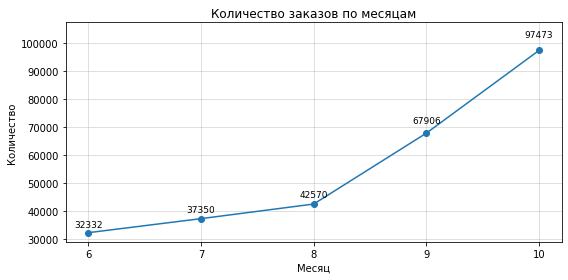

In [59]:
# Сгруппируем количество заказов по месяцам:
order_num_by_month = full_df.groupby('month')['order_id'].nunique()

# Построим график:
order_num_by_month_ax = order_num_by_month.plot(kind='line',
                                                figsize=(8,4),
                                                marker='o')
# Сделаем загаловки:
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')

# Добавим сетку:
plt.grid(True, alpha=0.5)

# Увеличим масштаб:
order_num_by_month_ax.set_ylim(top=order_num_by_month.max() + 10000)

# Добавим надписи:
for x, y in zip(order_num_by_month.index, order_num_by_month.values):
    order_num_by_month_ax.text(x, y*1.04, str(y), ha='center', va='bottom', fontsize=9)

# Зададим ось х:
order_num_by_month_ax.set_xticks(order_num_by_month.index)
order_num_by_month_ax.set_xticklabels(order_num_by_month.index.astype(str))

plt.tight_layout()
plt.show()

На графике наблюдается рост количества заказов с течением времени. С наступлением осени заказов стало намного больше. Возможно, это связано с тем, что люди вернулись с отпусков и решили купить билеты в сервисе.

- Сравним распределение заказов билетов для осеннего и летнего периодов по разным категориям:
 
**Распределение по типу мероприятия**

In [60]:
# Посчитаем количество заказов по каждому мероприятию по сезонам:
order_num_by_event_type = full_df.groupby(['season', 'event_type_main'], observed=True)['order_id'].nunique().reset_index(name='count')
order_num_by_event_type

,season,event_type_main,count
0,лето,выставки,2392
1,лето,другое,27867
2,лето,концерты,49386
3,лето,спорт,2682
4,лето,стендап,6222
5,лето,театр,23418
6,лето,ёлки,268
7,осень,выставки,2390
8,осень,другое,32032
9,осень,концерты,62122


In [61]:
# Cоздадим сводную таблицу:
table_by_event_type = order_num_by_event_type.pivot_table(index='event_type_main',
                                                          columns='season',
                                                          values='count').astype(int)
table_by_event_type

season,лето,осень
event_type_main,,
выставки,2392,2390
другое,27867,32032
концерты,49386,62122
спорт,2682,18284
стендап,6222,6795
театр,23418,42116
ёлки,268,1631


In [62]:
# Переведем значения в доли:
order_perc_by_event_type = round(table_by_event_type / table_by_event_type.sum(axis=0) * 100, 2)
order_perc_by_event_type

season,лето,осень
event_type_main,,
выставки,2.13,1.45
другое,24.83,19.37
концерты,44.00,37.57
спорт,2.39,11.06
стендап,5.54,4.11
театр,20.87,25.47
ёлки,0.24,0.99


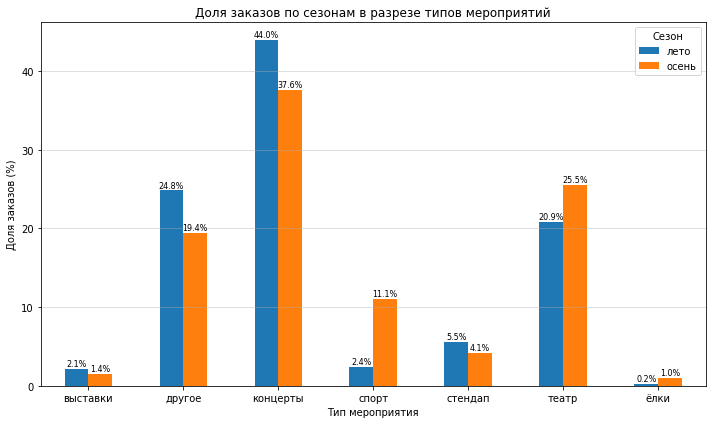

In [63]:
# Построим столбчатую диаграмму:
order_perc_by_event_type_ax = order_perc_by_event_type.plot(kind='bar',
                                                            figsize=(10, 6),
                                                            rot=0)

# Подписи:
for container in order_perc_by_event_type_ax.containers:
    for bar in container:
        height = bar.get_height()
        order_perc_by_event_type_ax.text(bar.get_x() + bar.get_width()/2,
                                         height+0.1,
                                         f'{height:.1f}%',
                                         ha='center',
                                         va='bottom',
                                         fontsize=8)

# Сделаем заголовки:
plt.title('Доля заказов по сезонам в разрезе типов мероприятий')
plt.xlabel('Тип мероприятия')
plt.ylabel('Доля заказов (%)')
plt.legend(title='Сезон')

plt.grid(True, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

In [64]:
# Выведем количество заказов по каждому сезону:
table_sum = table_by_event_type.sum(axis=0).astype(int)
table_sum

season
лето     112235
осень    165370
dtype: int64

In [65]:
# В процентном соотношении:
round(table_sum*100/table_by_event_type.sum().sum())

season
лето     40.0
осень    60.0
dtype: float64

Если рассмотреть количество заказов летом и осенью в абсолютных значениях, то показатели почти каждого мероприятия выросли (только заказов на выставки осенью стало на 2 шт. меньше). В относительных значениях распределение совершенно другое, т.к. в целом количество заказов осенью увеличилось на 20%.

Большую разницу в количестве заказов билетов летом и осенью составили заказы на концерты. Осенью заказов стало больше на 12736 шт., но в процентном соотношении показатель упал на 6.4% относительно каждого сезона по отдельности.

Осенью пользователи чаще стали покупать билеты на спортивные мероприятия и в театр. На спортивные события было сделано на 15602 заказа больше осенью, чем летом. В процентном соотношении это составляет 8.7%. Осенью в театр пользователи сделали заказов на 18698 шт. больше, чем летом (на 4.6% больше).

Осенью пользователям стали наиболее интересны спортивные мероприятия, театры и елки.

**Распределение по типу устройства**

In [66]:
# Посчитаем количество заказов по каждому устройству по сезонам:
order_num_by_device = full_df.groupby(['season', 'device_type_canonical'], observed=True)['order_id'].nunique().reset_index(name='count')
order_num_by_device

,season,device_type_canonical,count
0,лето,desktop,21392
1,лето,mobile,90860
2,осень,desktop,33579
3,осень,mobile,131800


In [67]:
# Cоздадим сводную таблицу:
table_by_device = order_num_by_device.pivot_table(index='device_type_canonical',
                                                  columns='season',
                                                  values='count').astype(int)
table_by_device

season,лето,осень
device_type_canonical,,
desktop,21392,33579
mobile,90860,131800


In [68]:
# Переведем значения в доли:
order_perc_by_device = round(table_by_device/table_by_device.sum(axis=0) * 100, 2)
order_perc_by_device

season,лето,осень
device_type_canonical,,
desktop,19.06,20.3
mobile,80.94,79.7


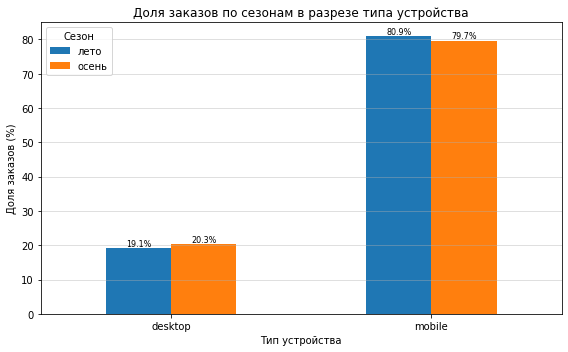

In [69]:
# Построим столбчатую диаграмму:
order_perc_by_device_ax = order_perc_by_device.plot(kind='bar',
                                                    figsize=(8, 5),
                                                    rot=0)

# Подписи:
for container in order_perc_by_device_ax.containers:
    for bar in container:
        height = bar.get_height()
        order_perc_by_device_ax.text(bar.get_x() + bar.get_width()/2,
                                     height+0.1,
                                     f'{height:.1f}%',
                                     ha='center',
                                     va='bottom',
                                     fontsize=8)

# Сделаем заголовки:
plt.title('Доля заказов по сезонам в разрезе типа устройства')
plt.xlabel('Тип устройства')
plt.ylabel('Доля заказов (%)')
plt.legend(title='Сезон')

plt.grid(True, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

Осенью больше пользователей стали пользоваться десктопной версией. Возможно, это связано с тем, что летом пользователи были в отпуске и не у всех был доступ к компьютеру и с телефона было проще пользоваться сервисом Яндекс Афиша.

**Распределение по возрастному рейтингу**

In [70]:
# Посчитаем количество заказов по каждому устройству по сезонам:
order_num_by_age_limit = full_df.groupby(['season', 'age_limit'], observed=True)['order_id'].nunique().reset_index(name='count')
order_num_by_age_limit

,season,age_limit,count
0,лето,0,20151
1,лето,6,20626
2,лето,12,23775
3,лето,16,32204
4,лето,18,15496
5,осень,0,38340
6,осень,6,29180
7,осень,12,36715
8,осень,16,43937
9,осень,18,17207


In [71]:
# Cоздадим сводную таблицу:
table_by_age_limit = order_num_by_age_limit.pivot_table(index='age_limit',
                                                        columns='season',
                                                        values='count').astype(int)
table_by_age_limit

season,лето,осень
age_limit,,
0,20151,38340
6,20626,29180
12,23775,36715
16,32204,43937
18,15496,17207


In [72]:
# Переведем значения в доли:
order_perc_by_age_limit = round(table_by_age_limit/table_by_age_limit.sum(axis=0) * 100, 2)
order_perc_by_age_limit

season,лето,осень
age_limit,,
0,17.95,23.18
6,18.37,17.64
12,21.18,22.20
16,28.69,26.57
18,13.80,10.40


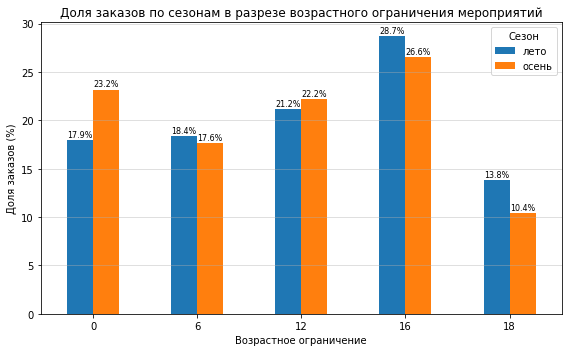

In [73]:
# Построим столбчатую диаграмму:
order_perc_by_age_limit_ax = order_perc_by_age_limit.plot(kind='bar',
                                                    figsize=(8, 5),
                                                    rot=0)

# Подписи:
for container in order_perc_by_age_limit_ax.containers:
    for bar in container:
        height = bar.get_height()
        order_perc_by_age_limit_ax.text(bar.get_x() + bar.get_width()/2,
                                        height+0.1,
                                        f'{height:.1f}%',
                                        ha='center',
                                        va='bottom',
                                        fontsize=8)

# Сделаем заголовки:
plt.title('Доля заказов по сезонам в разрезе возрастного ограничения мероприятий')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Доля заказов (%)')
plt.legend(title='Сезон')

plt.grid(True, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

В абсолютных значениях заказов на мероприятия с любым возрастным ограничением стало больше.

Осенью пользователи стали оформлять больше заказов на мероприятия с возрастным ограничением 0+. В процентном соотношении их стало больше на 5.3%, летом было 20151 заказов, а осенью - 38340 шт. Также на 1% увеличилось число заказов на мероприятия 12+ (летом было 23775 шт., осенью - 36715).

На мероприятия 16+ и 18+ заказов стало меньше на 2.1% и 3.4% соответственно.

Вероятно, осенью вернулись школьники после летних каникул и стали ходить на мероприятия 0+ и 12+. 

- Изучим изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью

In [74]:
# Сгруппируем среднюю выручку с продажи 1 билета по сезонам и типам мероприятий:
avg_revenue_by_event = full_df.groupby(['season','event_type_main'], observed=True)['one_ticket_revenue_rub'].mean().reset_index(name='avg')
avg_revenue_by_event

,season,event_type_main,avg
0,лето,выставки,86.722321
1,лето,другое,87.749680
2,лето,концерты,307.954468
3,лето,спорт,55.545891
4,лето,стендап,219.377533
5,лето,театр,216.995300
6,лето,ёлки,273.779510
7,осень,выставки,91.977829
8,осень,другое,76.846199
9,осень,концерты,268.419708


In [75]:
# Cоздадим сводную таблицу:
revenue_table_by_event = avg_revenue_by_event.pivot_table(index='event_type_main',
                                                  columns='season',
                                                  values='avg')
revenue_table_by_event

season,лето,осень
event_type_main,,
выставки,86.722321,91.977829
другое,87.749680,76.846199
концерты,307.954468,268.419708
спорт,55.545891,50.309158
стендап,219.377533,231.809494
театр,216.995300,176.597458
ёлки,273.779510,232.569397


In [76]:
# Переведем значения в доли:
revenue_perc_by_event = round(revenue_table_by_event/revenue_table_by_event.sum(axis=0) * 100, 2)
revenue_perc_by_event

season,лето,осень
event_type_main,,
выставки,6.950000,8.150000
другое,7.030000,6.810000
концерты,24.670000,23.780001
спорт,4.450000,4.460000
стендап,17.580000,20.540001
театр,17.389999,15.650000
ёлки,21.940001,20.610001


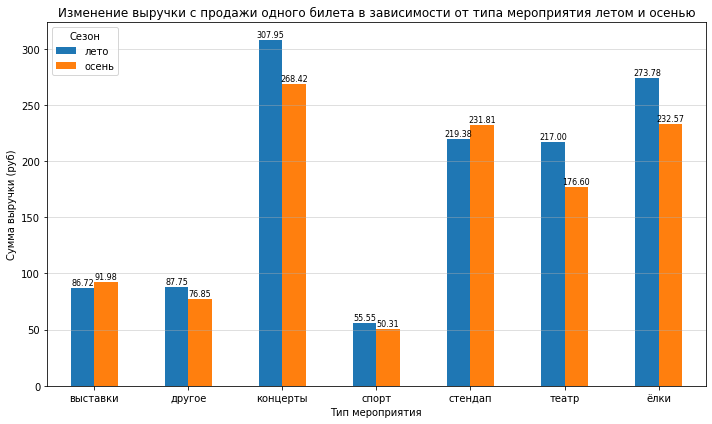

In [77]:
# Построим столбчатую диаграмму:
revenue_perc_by_event_ax = revenue_table_by_event.plot(kind='bar',
                                                    figsize=(10, 6),
                                                    rot=0)

# Подписи:
for container in revenue_perc_by_event_ax.containers:
    for bar in container:
        height = bar.get_height()
        revenue_perc_by_event_ax.text(bar.get_x() + bar.get_width()/2,
                                     height+0.9,
                                     f'{height:.2f}',
                                     ha='center',
                                     va='bottom',
                                     fontsize=8)

# Сделаем заголовки:
plt.title('Изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью')
plt.xlabel('Тип мероприятия')
plt.ylabel('Сумма выручки (руб)')
plt.legend(title='Сезон', loc='upper left')

plt.grid(True, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

Рассмотрим динамику выручки по разным типам мероприятий.

In [78]:
# Посчитаем разницу в выручке между осенью и летом:
round((revenue_table_by_event['осень']/revenue_table_by_event['лето']-1)*100,2)

event_type_main
выставки     6.060000
другое     -12.430000
концерты   -12.840000
спорт       -9.430000
стендап      5.670000
театр      -18.620001
ёлки       -15.050000
dtype: float32

Средняя выручка с 1 билета заметно выросла у категории мероприятий стендап. Летом выручка составляла 219.4 руб с 1 билета, осенью стала 231.8 рублей. В относительном соотношении по сезонам разница составила 5.67%.

Также на 6.06% выросла средняя выручка на 1 билет на выставки. Летом средняя выручка была 86.7 руб, осенью - 92 рубля.

На спортивные мероприятия выручка упала на 5.2 рубля (летом была 55.5 руб, осенью - 50.3 руб), в процентном соотношении показатель понизился на 9.43%.

На остальные типы мероприятий средняя выручка на 1 билет осенью упала. На концерты она стала на 12.84% ниже (летом была 308 руб, осенью - 268.4 руб). На театральные представления выручка стала ниже на 18.62%. Летом средняя выручка на 1 билет составляла 217 рублей и осенью снизилась до 176.6 руб.

Следовательно, организаторы мероприятий с приходом осени повысили стоимость билетов на выставки и стендап-концерты, на другие же мероприятия цену, а соответственно, и выручку, понизили.

### Осенняя активность пользователей

- Проанализируем динамику изменений по дням для:
  - общего числа заказов;
  - количества активных пользователей DAU;
  - среднего числа заказов на одного пользователя;
  - средней стоимости одного билета.

In [79]:
# Отфильтруем датасет по осенним месяцам:
autumn_df = full_df[full_df['season']=='осень'].copy()

In [80]:
# Построим сводную таблицу:
autumn_daily_stats = autumn_df.pivot_table (index='created_dt_msk',
                                            aggfunc={
                                                'order_id':'nunique',
                                                'user_id':'nunique',
                                                'total':'sum',
                                                'tickets_count':'sum'})
# Переименуем названия столбцов:
autumn_daily_stats.rename(columns={
    'order_id': 'order_num',
    'user_id': 'DAU'}, 
     inplace=True)

# Создадим столбцы:
autumn_daily_stats['orders_per_user'] = round(autumn_daily_stats['order_num']/autumn_daily_stats['DAU']).astype(int)
autumn_daily_stats['avg_ticket_price'] = round(autumn_daily_stats['total']/autumn_daily_stats['tickets_count'],2)

# Удалим ненужные столбцы:
autumn_daily_stats.drop(columns=['total', 'tickets_count'], inplace=True)

# Поменяем строки со столбцами местами:
autumn_daily_stats_transposed = autumn_daily_stats.T

pd.set_option('display.max_columns', 100) #помогает вывести все столбцы

# Выведем результат:
autumn_daily_stats_transposed

created_dt_msk,2024-09-01,2024-09-02,2024-09-03,2024-09-04,2024-09-05,2024-09-06,2024-09-07,2024-09-08,2024-09-09,2024-09-10,2024-09-11,2024-09-12,2024-09-13,2024-09-14,2024-09-15,2024-09-16,2024-09-17,2024-09-18,2024-09-19,2024-09-20,2024-09-21,2024-09-22,2024-09-23,2024-09-24,2024-09-25,2024-09-26,2024-09-27,2024-09-28,2024-09-29,2024-09-30,2024-10-01,2024-10-02,2024-10-03,2024-10-04,2024-10-05,2024-10-06,2024-10-07,2024-10-08,2024-10-09,2024-10-10,2024-10-11,2024-10-12,2024-10-13,2024-10-14,2024-10-15,2024-10-16,2024-10-17,2024-10-18,2024-10-19,2024-10-20,2024-10-21,2024-10-22,2024-10-23,2024-10-24,2024-10-25,2024-10-26,2024-10-27,2024-10-28,2024-10-29,2024-10-30,2024-10-31
order_num,1290.00,1357.00,4974.00,1740.00,1922.00,2033.0,1826.0,1578.00,2058.00,1975.00,2188.00,2296.0,2669.00,2298.00,1941.00,2037.00,2220.00,2406.0,2538.00,2830.00,2355.00,1803.0,2293.00,2602.0,2603.00,2440.00,2722.00,2460.00,2164.0,2288.00,7100.00,2531.00,2601.00,2880.00,2651.00,2388.00,2671.00,2581.00,2489.00,3026.00,2998.00,2813.00,2441.00,2890.00,3814.0,2823.00,3021.00,3700.00,2962.00,2541.00,2807.00,2746.00,2855.00,3032.00,4457.00,3460.00,2811.00,2796.00,2798.00,2876.00,5914.00
DAU,551.00,567.00,770.00,678.00,733.00,822.0,731.0,649.00,773.00,756.00,809.00,854.0,941.00,829.00,710.00,743.00,774.00,808.0,836.00,944.00,865.00,778.0,797.00,938.0,949.00,888.00,1010.00,908.00,830.0,879.00,1085.00,908.00,942.00,953.00,971.00,880.00,893.00,955.00,955.00,1034.00,1052.00,1046.00,920.00,1020.00,1089.0,1075.00,1051.00,1128.00,1073.00,909.00,968.00,968.00,1016.00,983.00,1214.00,1110.00,1022.00,975.00,994.00,1022.00,1261.00
orders_per_user,2.00,2.00,6.00,3.00,3.00,2.0,2.0,2.00,3.00,3.00,3.00,3.0,3.00,3.00,3.00,3.00,3.00,3.0,3.00,3.00,3.00,2.0,3.00,3.0,3.00,3.00,3.00,3.00,3.0,3.00,7.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.0,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,5.00
avg_ticket_price,2307.49,2544.55,1363.14,2503.32,2621.76,2613.4,2603.0,2383.55,1976.22,2270.31,2190.51,2273.1,2182.53,2152.75,2281.53,2322.66,2279.08,2181.9,2180.01,2173.99,2259.88,2378.3,2203.88,2033.0,2228.01,2364.03,2345.24,2268.82,2354.0,2273.41,1422.94,2276.59,2378.53,2307.88,2398.43,2416.01,2270.07,2251.71,2376.58,2326.35,2345.68,2461.64,2449.16,2230.39,1929.9,2272.85,2241.55,2439.46,2361.83,2397.16,2236.78,2167.52,2184.63,2291.09,2253.24,2065.65,2237.08,2049.16,2066.06,2262.77,2106.84


Сначала построим общий график для показателей общего числа заказов, количества активных пользователей DAU и средней стоимости одного билета, чтобы увидеть общую динамику.

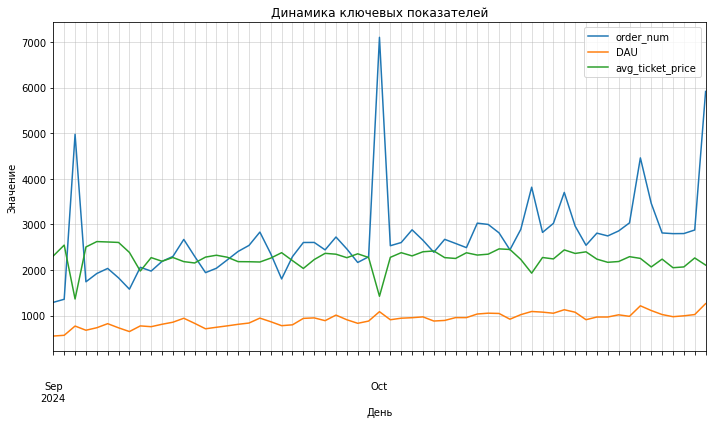

In [81]:
# Построим общий график:
ax = autumn_daily_stats[['order_num', 'DAU', 'avg_ticket_price']].plot(
    kind='line',
    figsize=(10, 6),
    subplots=False
)

# Заголовки:
plt.title('Динамика ключевых показателей')
plt.xlabel('День')
plt.ylabel('Значение')

# Добавим сетку:
plt.grid(True, alpha=0.5)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

plt.tight_layout()
plt.show()

Можно отметить, что в дни, когда количесство заказов больше, чем обычно, то и количество активных пользователей тоже больше, но из-за этого средняя цена ниже.

Теперь рассмотрим все графики подробнее.

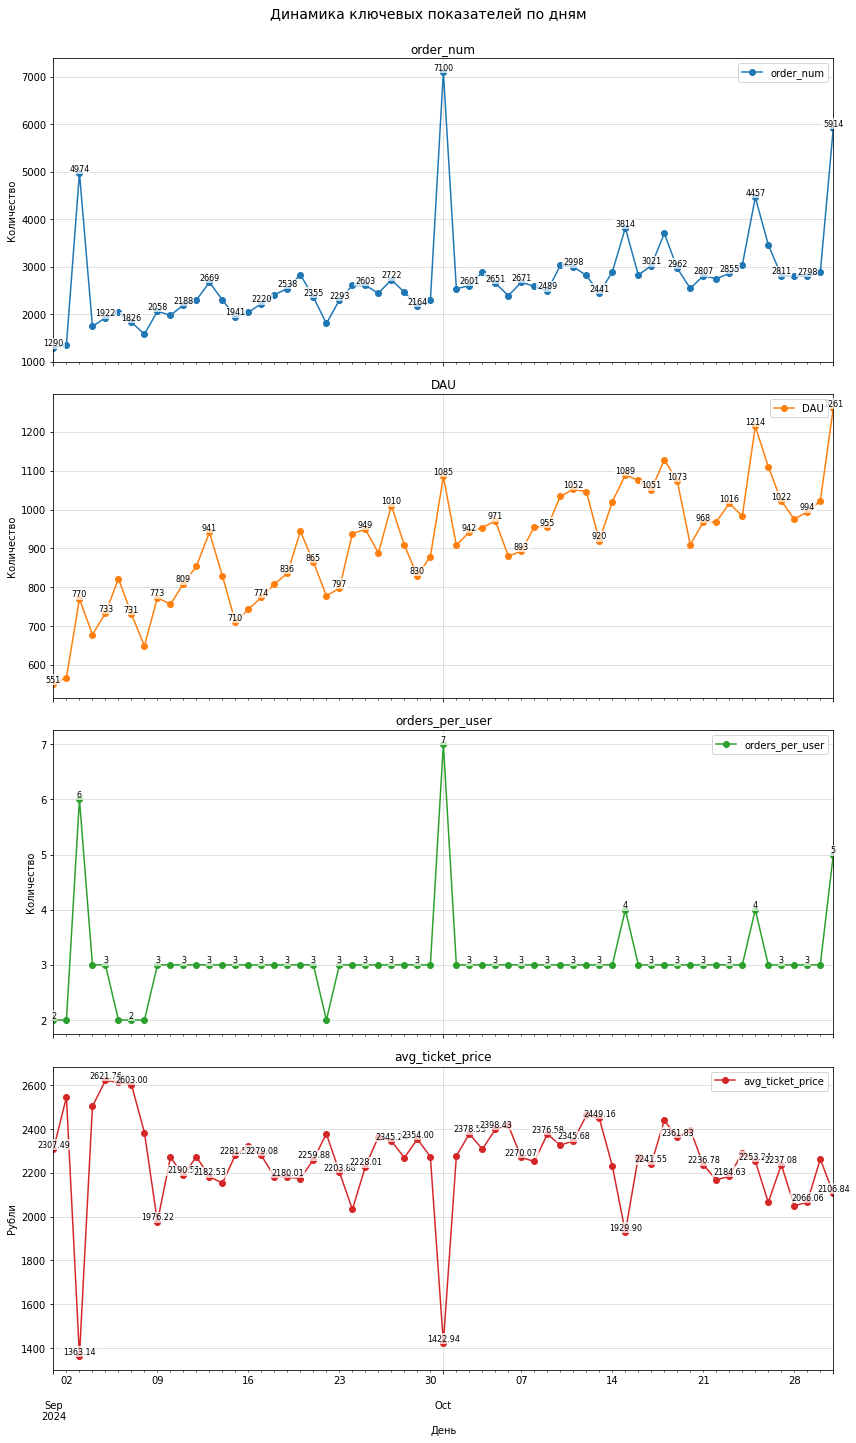

In [82]:
# Создадим subplots:
axes = autumn_daily_stats.plot(
    kind='line',
    subplots=True,
    marker='o',
    figsize=(12, 20)
)

# Общий заголовок:
plt.suptitle('Динамика ключевых показателей по дням', y=1, fontsize=14)

# Добавим подписи только к каждой 2-ой точке:
for ax, column in zip(axes.flatten(), autumn_daily_stats.columns):
    data = autumn_daily_stats[column]
    
    # Добавим подписи с шагом:
    for i, (x, y) in enumerate(zip(autumn_daily_stats.index, data)):
        if i % 2 == 0:
            if column == 'avg_ticket_price':
                label = f"{y:.2f}"
            else:
                label = f"{int(y)}"
            
            ax.text(x, y, label,
                    ha='center',
                    va='bottom',
                    fontsize=8,
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))            
    
    # Настройки графика:
    ax.set_title(column)
    ax.grid(True, alpha=0.5)
    ax.set_xlabel('День')
    
    if column == 'avg_ticket_price':
        ax.set_ylabel('Рубли')
    else: ax.set_ylabel('Количество')

plt.tight_layout()
plt.show()

Если рассматривать динамику числа заказов и количества активных пользователей, то можно отметить положительный тренд. Большее число заказов можно отметить на стыках месяцев. Так, например, 3 сентября (вторник), 1 октября (вторник) и 31 октября (четверг) происходили резкие скачки в количестве заказов в положительную сторону.

Среднее количество заказов на 1 пользователя в осенний период чаще всего составляло 3 заказа. Лишь в некоторые дни, когда пользователи оформляли намного меньше или больше заказов в сравнении со всем рассматриваемым периодом, среднее число заказов на 1 юзера было по 2 или 4-7 шт.

Теперь рассмотрим динамику показателей по дням недели.

In [83]:
# Создадим новый столбец с днем недели:
autumn_df['day_of_week'] = autumn_df['created_dt_msk'].dt.day_of_week+1

In [84]:
# Построим сводную таблицу:
autumn_DOW_stats = autumn_df.pivot_table (index='day_of_week',
                                            aggfunc={
                                                'order_id':'nunique',
                                                'user_id':'nunique',
                                                'total':'sum',
                                                'tickets_count':'sum'})
# Переименуем названия столбцов:
autumn_DOW_stats.rename(columns={
    'order_id': 'order_num',
    'user_id': 'DAU'}, 
     inplace=True)

# Создадим столбцы:
autumn_DOW_stats['orders_per_user'] = round(autumn_DOW_stats['order_num']/autumn_DOW_stats['DAU']).astype(int)
autumn_DOW_stats['avg_ticket_price'] = round(autumn_DOW_stats['total']/autumn_DOW_stats['tickets_count'],2)

# Удалим ненужные столбцы:
autumn_DOW_stats.drop(columns=['total', 'tickets_count'], inplace=True)

# Поменяем строки со столбцами местами:
autumn_DOW_stats_transposed = autumn_DOW_stats.T

# Выведем результат:
autumn_DOW_stats_transposed

day_of_week,1,2,3,4,5,6,7
order_num,21197.00,30810.00,22511.0,26790.00,24289.00,20825.00,18957.00
DAU,4407.00,4748.00,4768.0,4929.00,4803.00,4486.00,4303.00
orders_per_user,5.00,6.00,5.0,5.00,5.00,5.00,4.00
avg_ticket_price,2217.25,1822.94,2267.7,2277.11,2323.23,2306.71,2356.89


Построим графики для наглядности.

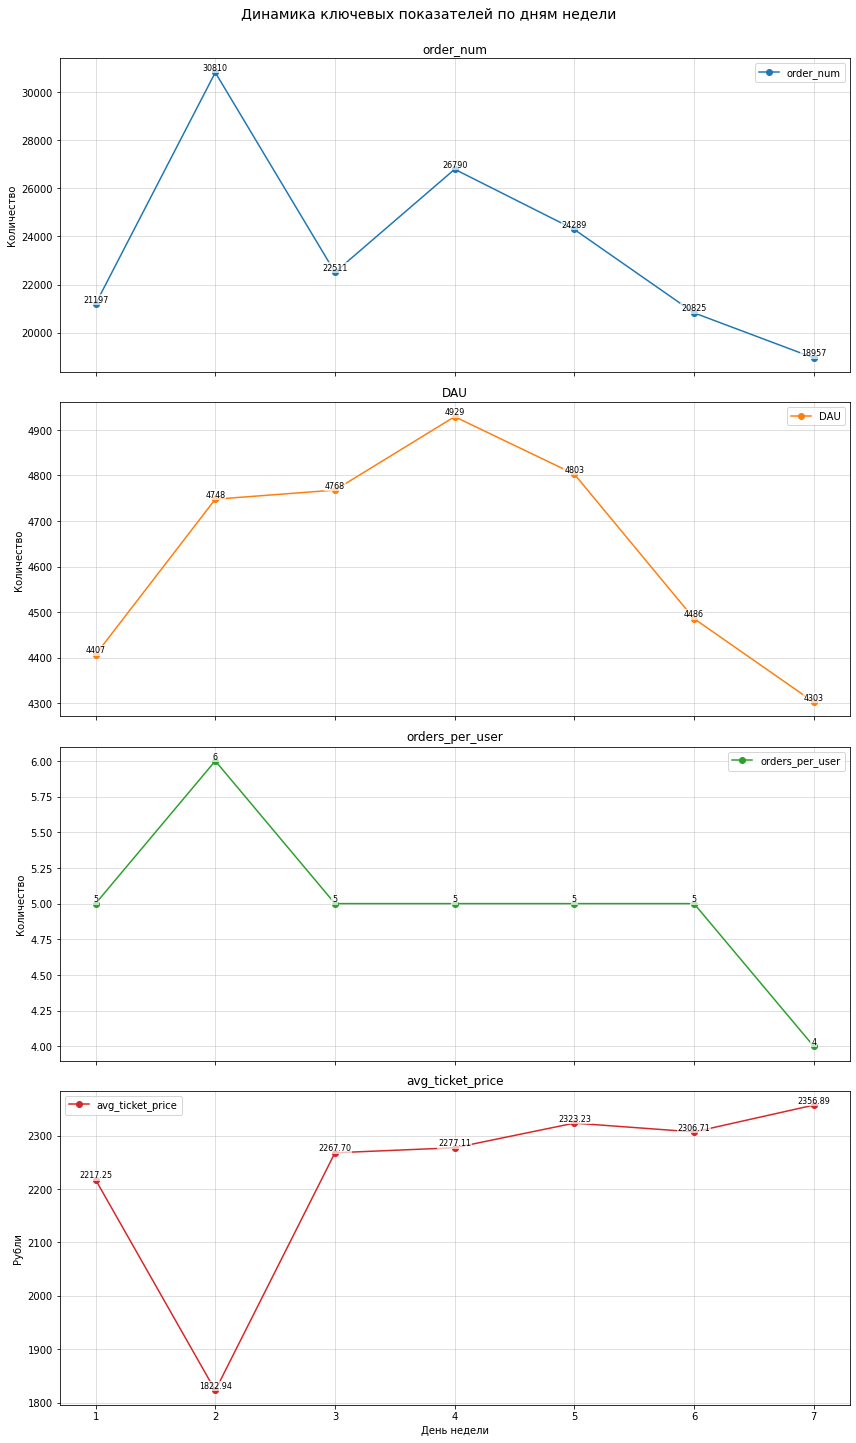

In [85]:
# Создадим subplots:
axes = autumn_DOW_stats.plot(
    kind='line',
    subplots=True,
    marker='o',
    figsize=(12, 20)
)

# Общий заголовок:
plt.suptitle('Динамика ключевых показателей по дням недели', y=1, fontsize=14)

# Добавим подписи:
for ax, column in zip(axes.flatten(), autumn_DOW_stats.columns):
    data = autumn_DOW_stats[column]
    
    for i, (x, y) in enumerate(zip(autumn_DOW_stats.index, data)):
        if column == 'avg_ticket_price':
            label = f"{y:.2f}"
        else:
            label = f"{int(y)}"
           
        ax.text(x, y, label,
                ha='center',
                va='bottom',
                fontsize=8,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))            
    
    # Настройки графика:
    ax.set_title(column)
    ax.grid(True, alpha=0.5)
    ax.set_xlabel('День недели')
    
    if column == 'avg_ticket_price':
        ax.set_ylabel('Рубли')
    else: ax.set_ylabel('Количество')

plt.tight_layout()
plt.show()

Чаще всего пользователи оформляют заказы по вторникам - всего за осенний период было оформлено 30810 заказов. А реже юзеры делают заказы по воскресеньям - было зарегистрировано лишь 18957 заказов в этот день недели.

Больше всего активных пользователей по четвергам (всего 4929 чел), менее охотно пользователи оформляют заказы по воскресеньям - только 4303 человека были активны. 

В среднем по вторникам пользователи оформляют по 6 заказов, по воскресеньям - лишь 4 шт. Это объясняется тем, что во вторник только 4748 пользователя были активны, но именно они оформили наибольшее количество заказов и сделали высокое среднее значение по количеству заказов, в отлличие от воскресных пользователей.

Самая высокая средняя стоимость билета в воскресенье (2357 руб), самая низкая - во вторник (1823 руб). Во вторник пользователи оформляют больше заказов, но по более низким ценам. В выходной же день меньше пользователей заходят в приложение и делают более дорогие заказы.

Можно предположить, что меньшая активность пользователей в выходные дни обусловлена тем, что в воскресенье они чаще отдыхают и, возможно, посещают мероприятия, на которые оформляют заказы в будние дни. Также возможно, что сервисы повышают стоимость билетов в выходные дни, и поэтому средняя стоимость билетов в выходные дни выше, чем в будние.

### Популярные события и партнёры

Для каждого **региона** посчитаем уникальное количество мероприятий и общее число заказов.

In [86]:
# Для каждого региона посчитаем необходимую статистику:
region_stats = autumn_df.groupby('region_name')[['event_id', 'order_id']].nunique().sort_values(by=['event_id', 'order_id'], ascending=False)
region_stats.head(10)

,event_id,order_id
region_name,,
Каменевский регион,3878,45847
Североярская область,2580,20250
Широковская область,790,8528
Светополянский округ,752,4697
Речиновская область,527,3512
Серебринская область,453,4392
Яблоневская область,429,4139
Тепляковская область,418,2424
Горицветская область,403,3190


Наиболее популярными регионами являются Каменевский регион и Североярская область. В данных регионах проводилось наибольшее количество мероприятий в размере 3878 штук в Каменевском регионе и 2580 шт. в Североярской области. Также количество оформленных заказов у них тоже наибольшее - 45847 и 20250 соответственно.

**Построим визуализацию в относительных значениях:**
- по количеству мероприятий среди разных регионов

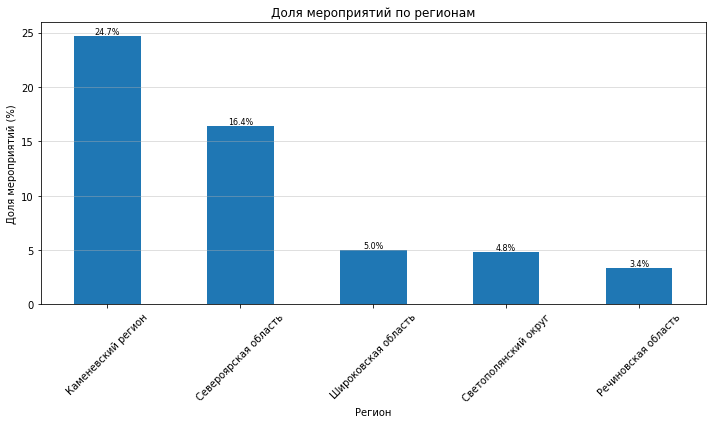

In [87]:
# Переведем значения в доли:
region_event_perc = (100*region_stats['event_id']/region_stats['event_id'].sum()).head(5)

# Построим столбчатую диаграмму:
region_event_perc_ax = region_event_perc.plot(kind='bar',
                                                   figsize=(10, 6),
                                                    rot=45)

# Подписи:
for i, (region, value) in enumerate(region_event_perc.items()):
    region_event_perc_ax.text(i, value,
            f'{value:.1f}%',
            ha='center',
            va='bottom',
            fontsize=8)
        
# Сделаем заголовки:
plt.title('Доля мероприятий по регионам')
plt.xlabel('Регион')
plt.ylabel('Доля мероприятий (%)')

plt.grid(True, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

- по числу заказов среди разных регионов

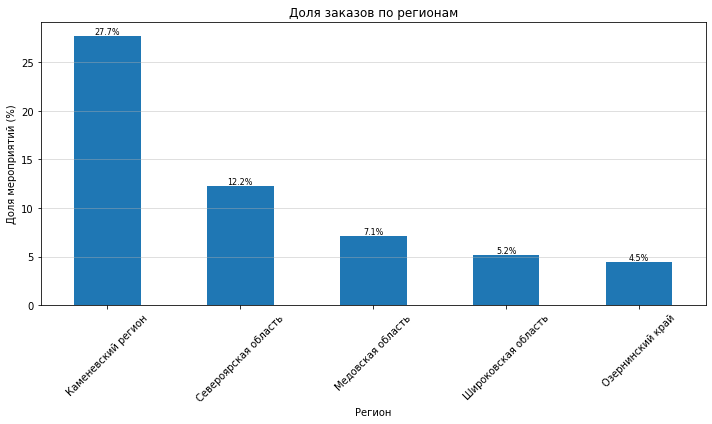

In [88]:
# Переведем значения в доли:
region_order_perc = (100*region_stats['order_id']/region_stats['order_id'].sum()).sort_values(ascending=False).head(5)

# Построим столбчатую диаграмму:
region_order_perc_ax = region_order_perc.plot(kind='bar',
                                                   figsize=(10, 6),
                                                    rot=45)

# Подписи:
for i, (region, value) in enumerate(region_order_perc.items()):
    region_order_perc_ax.text(i, value,
            f'{value:.1f}%',
            ha='center',
            va='bottom',
            fontsize=8)
        
# Сделаем заголовки:
plt.title('Доля заказов по регионам')
plt.xlabel('Регион')
plt.ylabel('Доля мероприятий (%)')

plt.grid(True, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

Получается, что Каменевский регион и Североярская область являются ключевыми для сервиса Яндекс Афиша. Они занимают 24.7% и 16.4% от всего количества проводимых мероприятий среди всех регионов, а также 27.7% и 12.2% по количеству оформленных заказов. Остальные регионы занимают намного меньшую долю среди лидеров.

Следовательно, стоит уделить наибольшее внимание Каменевскому региону и Североярской области, т.к. они вносят наибольший вклад в выручку сервиса.

Для **каждого билетного партнёра** посчитаем общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов.

In [89]:
# Для каждого партнера посчитаем необходимую статистику:
service_stats = autumn_df.groupby('service_name').agg({'event_id':'nunique', 'order_id':'nunique', 'revenue':'sum'}).sort_values(by=['event_id', 'order_id','revenue'], ascending=False)

# Преобразуем выручку в более читабельный вид:
service_stats['revenue'] = service_stats['revenue'].round(-3).astype(int).apply(lambda x: f"{x:,}".replace(",", " "))

service_stats.head(10)

,event_id,order_id,revenue
service_name,,,
Лови билет!,3567,25317,10 101 000
Билеты без проблем,2804,31474,13 185 000
Билеты в руки,2436,25072,7 369 000
Облачко,1401,15342,10 428 000
Лучшие билеты,1371,12194,1 621 000
Мой билет,998,19174,11 285 000
Тебе билет!,851,3690,2 089 000
Прачечная,727,5682,2 469 000
Весь в билетах,596,9291,9 122 000


**Построим визуализацию в относительных значениях:**
- по количеству мероприятий среди различных билетных партнеров

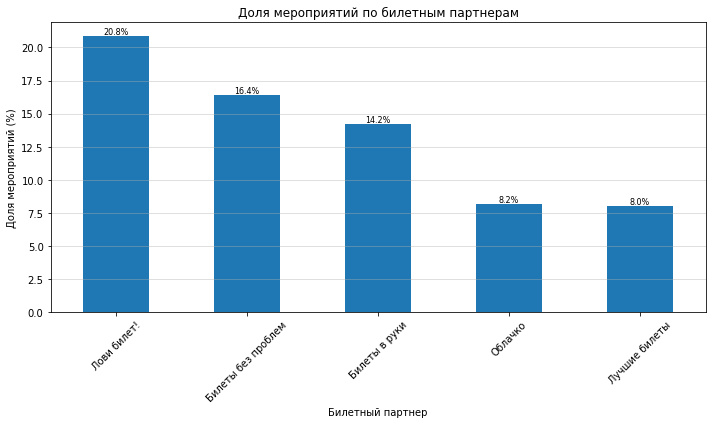

In [90]:
# Переведем значения в доли:
service_event_perc = (100*service_stats['event_id']/service_stats['event_id'].sum()).sort_values(ascending=False).head(5)

# Построим столбчатую диаграмму:
service_event_perc_ax = service_event_perc.plot(kind='bar',
                                                   figsize=(10, 6),
                                                    rot=45)

# Подписи:
for i, (region, value) in enumerate(service_event_perc.items()):
    service_event_perc_ax.text(i, value,
            f'{value:.1f}%',
            ha='center',
            va='bottom',
            fontsize=8)
        
# Сделаем заголовки:
plt.title('Доля мероприятий по билетным партнерам')
plt.xlabel('Билетный партнер')
plt.ylabel('Доля мероприятий (%)')

plt.grid(True, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

In [91]:
# Выведем топ-5 билетных партнеров по количеству мероприятий:
service_stats['event_id'].sort_values(ascending=False).head().reset_index()

,service_name,event_id
0,Лови билет!,3567
1,Билеты без проблем,2804
2,Билеты в руки,2436
3,Облачко,1401
4,Лучшие билеты,1371


В топ по количеству организованных мероприятий входят следующие билетные партнеры: "Лови билет!", "Билеты без проблем" и "Билеты в руки". Их доли с общего рынка билетных операторов составляют 20.8%, 16.4% и 14.2% соответственно. Количество проведенных ими мероприятий превосходит остальных организаторов в 2 или 3 раза. "Лови билет!" провели 3567 мероприятий, "Билеты без проблем" - 2804 шт и "Билеты в руки" - 2436 шт.

- по числу заказов среди различных билетных партнеров

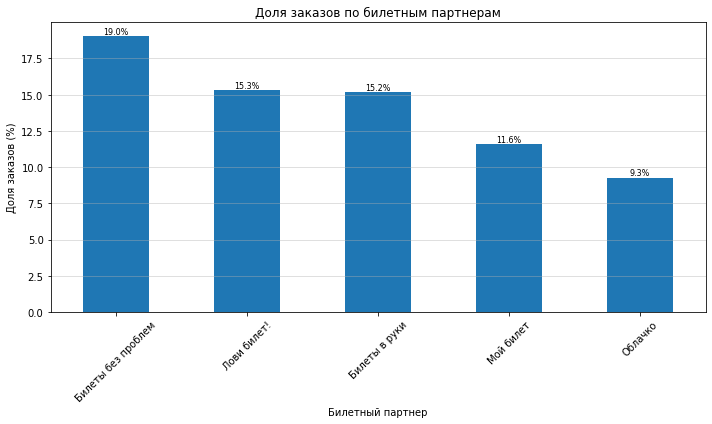

In [92]:
# Переведем значения в доли:
service_order_perc = (100*service_stats['order_id']/service_stats['order_id'].sum()).sort_values(ascending=False).head(5)

# Построим столбчатую диаграмму:
service_order_perc_ax = service_order_perc.plot(kind='bar',
                                                   figsize=(10, 6),
                                                    rot=45)

# Подписи:
for i, (region, value) in enumerate(service_order_perc.items()):
    service_order_perc_ax.text(i, value,
            f'{value:.1f}%',
            ha='center',
            va='bottom',
            fontsize=8)
        
# Сделаем заголовки:
plt.title('Доля заказов по билетным партнерам')
plt.xlabel('Билетный партнер')
plt.ylabel('Доля заказов (%)')

plt.grid(True, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

In [93]:
# Выведем топ-5 билетных партнеров по количеству заказов:
service_stats['order_id'].sort_values(ascending=False).head().reset_index()

,service_name,order_id
0,Билеты без проблем,31474
1,Лови билет!,25317
2,Билеты в руки,25072
3,Мой билет,19174
4,Облачко,15342


Больше всего пользователи оформили заказов на мероприятия от билетного партнера "Билеты без проблем" - 19%, что составляет 31474 мероприятия. Также данный организатор находится на 2 месте по количеству проведенных мероприятий.

"Лови билет!" и "Билеты в руки" обработали примерно одинаковое количество заказов - 15.3% (25317 заказов) и 15.2% (25072 шт) соответственно.

- по суммарной выручке с заказов среди различных билетных партнеров

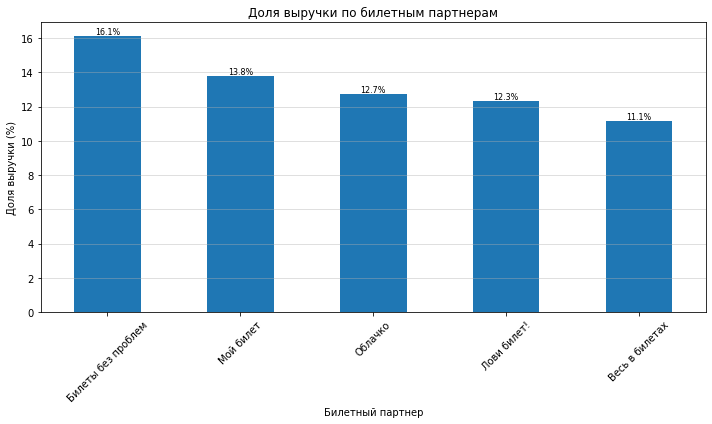

In [94]:
# Преобразуем выручку к числовому типу:
service_stats['revenue'] = service_stats['revenue'].str.replace(' ', '').astype(int)

# Переведем значения в доли:
service_revenue_perc = (100*service_stats['revenue']/service_stats['revenue'].sum()).sort_values(ascending=False).head(5)

# Построим столбчатую диаграмму:
service_revenue_perc_ax = service_revenue_perc.plot(kind='bar',
                                                   figsize=(10, 6),
                                                    rot=45)

# Подписи:
for i, (region, value) in enumerate(service_revenue_perc.items()):
    service_revenue_perc_ax.text(i, value,
            f'{value:.1f}%',
            ha='center',
            va='bottom',
            fontsize=8)
        
# Сделаем заголовки:
plt.title('Доля выручки по билетным партнерам')
plt.xlabel('Билетный партнер')
plt.ylabel('Доля выручки (%)')

plt.grid(True, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

In [95]:
# Выведем топ-5 билетных партнеров по выручке с заказов:
top_5_service_by_revenue = service_stats['revenue'].sort_values(ascending=False).head().reset_index()

# Преобразуем выручку в более читабельный вид:
top_5_service_by_revenue['revenue'] = top_5_service_by_revenue['revenue'].round(-3).astype(int).apply(lambda x: f"{x:,}".replace(",", " "))

top_5_service_by_revenue

,service_name,revenue
0,Билеты без проблем,13 185 000
1,Мой билет,11 285 000
2,Облачко,10 428 000
3,Лови билет!,10 101 000
4,Весь в билетах,9 122 000


Билетный партнер "Билеты без проблем" опять занял 1 место в топе. От него сервис получил наибольшую выручку за осенний период - около 13 млн 185 тыс рублей, что составляет 16.1% от суммарной выручки со всех партнеров.

"Мой билет", "Облачко", "Лови билет!" заработали для сервиса тоже довольно большие суммы выручки - около 11 млн 285 тыс руб (13.8% от всей выручки), 10 млн 428 тыс руб (12.7%) и 10 млн 101 тыс рублей (12.3%).


Исходя из анализа выше, самый выгодный билетный партнер - "Билеты без проблем". Данный организатор принес сервису наибольшую выручку и привлек наибольшее количество пользователей, которые оформили заказы на их мероприятия.

Также стоит обратить внимание на "Лови билет!". Данный билетный партнер приносит не такую высокую выручку, но зато с сильным отрывом на 4.4% от следующего в топе организатора провел большее число мероприятий среди своих конкурентов.

---

### Промежуточный вывод

В результате исследовательского анализа данных можно сделать следующие выводы:
- *Анализ распределения заказов по сегментам и их сезонные изменения показал:*
  - От июня к ноябрю 2024 года увеличивалось количество заказов. Возможно, это связано с тем, что пользователи вернулись с отпусков и решили купить билеты в сервисе.
  - Осенью пользователям стали наиболее интересны спортивные мероприятия, театры и елки. Количество оформленных заказов увеличилось на 8.7%, 4.6% и 0.8% соответственно.
  - Осенью больше пользователей стали пользоваться десктопной версией сервиса. Возможно, это снова связано с отпуском пользователей, у которых был ограничен доступ к компьютеру, и они оформляли заказы с телефона.
  - Также с наступлением осени, вероятно, с каникул вернулись школьники и детсадовцы, и поэтому стали актуальны мероприятия с возрастным ограничением в 0+ и 12+. Рост количества заказов в сравнении с летом составил 5.3% и 1% соответственно.
  - Средняя выручка с продажи одного билета выросла у следующих категорий мероприятий: стендап (на 5.67%) и выставки (на 6.06%). Получается, что осенью организаторы мероприятий повысили стоимость билетов на выставки и стендап-концерты, а на другие мероприятия понизили.

- *Анализ осенней активности пользователей показал:*
  - Наибольшее число заказов можно отметить на стыках месяцев. Например, 3 сентября (вторник), 1 октября (вторник) и 31 октября (четверг) происходил резкий рост в количестве заказов в положительную сторону.
  - Среднее количество заказов на 1 пользователя в осенний период чаще всего равнялось 3 заказам. Видимо, пользователи покупали билеты на несколько мероприятий в один день.
  - Пользователи наиболее активны во вторник и четверг. Они оформляют больше заказов, чем в выходные. Вероятно, в выходные дни пользователи сервиса чаще отдыхают и, возможно, посещают мероприятия, на которые оформляют заказы.
  - Средняя цена за 1 билет наоборот выше в выходные дни, чем в будни.

- *Анализ популярных событий и партнеров показал:*
  - Наиболее прибыльными регионами являются Каменевский регион и Североярская область. Они провели наибольшее количество мероприятий - 3878 шт (24.7%) и 2580 шт (16.4%) среди всех регионов. Также было оформлено 45847 и 20250 заказов в данных регионах, что составило - 27.7% и 12.2% от общего количества заказов во всех регионах вместе взятых.
  - Большее количество мероприятий было организовано следующими билетными партнерами сервиса: "Лови билет!", "Билеты без проблем" и "Билеты в руки". Их доли среди других конкурентов составляют 20.8%, 16.4% и 14.2% соответственно. Количество проведенных ими мероприятий превосходит остальных организаторов в 2 или 3 раза. 
  - Наибольшее количество пользователей оформили заказы на мероприятия от билетного партнера "Билеты без проблем" - 19%, что составляет 31474 мероприятия. Далее идут партнеры: "Лови билет!" и "Билеты в руки". Они обработали примерно одинаковое количество заказов - 15.3% (25317 заказов) и 15.2% (25072 шт) соответственно.
  - От билетного партнера "Билеты без проблем" сервис получил наибольшую выручку - около 13 млн 185 тыс рублей (16.1% от суммарной выручки со всех организаторов). "Мой билет", "Облачко", "Лови билет!" заработали для сервиса тоже довольно большие суммы выручки - около 11 млн 285 тыс руб (13.8% от всей выручки), 10 млн 428 тыс руб (12.7%) и 10 млн 101 тыс рублей (12.3%).
  - Самый выгодный билетный партнер - "Билеты без проблем": он принес сервису наибольшую выручку и наибольшее количество заказов на его мероприятия. Также стоит обратить внимание на "Лови билет!". Данный билетный партнер провел большее число мероприятий среди своих конкурентов и на 4.4% превосходит следующего в топе организатора.

---

## Статистический анализ данных

Необходимо проверить две гипотезы, которые предполагают большую активность пользователей мобильных устройств:
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

### Подготовка к тесту


**Нулевая гипотеза** - рассматриваемая статистика у пользователей мобильного приложения НЕ выше по сравнению с пользователями стационарных устройств.

**Альтернативная гипотеза** - рассматриваемая статистика у пользователей мобильного приложения ВЫШЕ по сравнению с пользователями стационарных устройств, и это различие статистически значимо.

Целевые метрики:
1. Среднее количество заказов на одного пользователя.
2. Среднее время между заказами пользователей.

In [96]:
# Выведем количество пользователей в каждой группе:
display(autumn_df.groupby('device_type_canonical')['user_id'].nunique())

device_type_canonical
desktop     4823
mobile     14015
Name: user_id, dtype: int64

Количество пользователей в обеих группах сильно разнится.

#### Проверка пересечения пользователей

In [97]:
# Создадим множества с айди пользователей:
users_mobile = set(autumn_df[autumn_df['device_type_canonical']=='mobile']['user_id'])
users_desktop = set(autumn_df[autumn_df['device_type_canonical']=='desktop']['user_id'])

# Выведем количество пользователей, которые встречаются одновременно в обеих группах:
len(users_mobile&users_desktop)

3203

В данных встречается 3203 пользователя, которые пользовались и мобильным приложением, и десктопной версией сервиса. Их необходимо удалить перед проведением теста.

In [98]:
# Найдем пересекающихся пользователей:
overlap_users = users_mobile&users_desktop

# Удалим повторы пользователей:
cleaned_df = autumn_df[~autumn_df['user_id'].isin(overlap_users)]

In [99]:
# Проверим удаление:
users_after_mobile = set(cleaned_df[cleaned_df['device_type_canonical']=='mobile']['user_id'])
users_after_desktop = set(cleaned_df[cleaned_df['device_type_canonical']=='desktop']['user_id'])

len(users_after_mobile & users_after_desktop)

0

In [100]:
# Выведем очищенное количество пользователей в каждой группе:
display(cleaned_df.groupby('device_type_canonical')['user_id'].nunique())

device_type_canonical
desktop     1620
mobile     10812
Name: user_id, dtype: int64

Теперь проведем статистический анализ для каждой гипотезы отдельно.

#### Проверка первой гипотезы:

**Нулевая гипотеза** - среднее количество заказов на одного пользователя мобильного приложения НЕ выше, чем у пользователя стационарного устройства.

**Альтернативная гипотеза** - среднее количество заказов на одного пользователя мобильного приложения ВЫШЕ, чем у пользователя стационарного устройства, и это различие статистически значимо.

**Проверка распределений значений**

In [101]:
# Найдем количество заказов, которые совершили пользователи:
order_num = cleaned_df.groupby(['user_id','device_type_canonical'])['order_id'].nunique().reset_index(name='count')

# Разделим датафреймы по типу девайса:
mobile_order_num = order_num[order_num['device_type_canonical']=='mobile']
desktop_order_num = order_num[order_num['device_type_canonical']=='desktop']

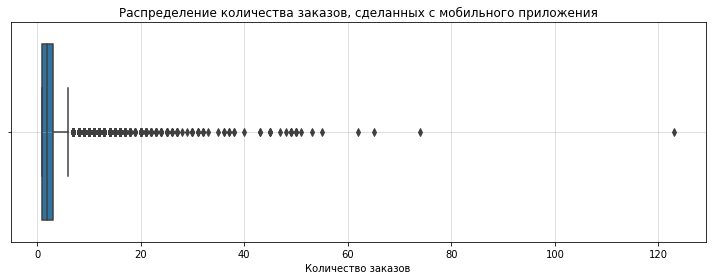

In [102]:
# Построим диаграмму размаха:
plt.figure(figsize=(10,4))
sns.boxplot(data=mobile_order_num, x='count')
plt.title('Распределение количества заказов, сделанных с мобильного приложения')
plt.xlabel('Количество заказов')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

In [103]:
# Выведем краткое описание статистики кол-ва заказов:
mobile_order_num['count'].describe(percentiles=[0.5,0.75,0.99])

count    10812.000000
mean         2.850721
std          4.087348
min          1.000000
50%          2.000000
75%          3.000000
99%         19.890000
max        123.000000
Name: count, dtype: float64

Медиана и среднее значение практически равны, значит, большинство пользователей оформили 2-3 заказа за весь осенний период. Максимальное значение равно 123 заказам, а 99 перцентиль - 19 шт. В данных множество выбросов, поэтому удалим все данные после 99%.

In [104]:
# Удалим выбросы:
mobile_order_num_clean = mobile_order_num[mobile_order_num['count']<mobile_order_num['count'].quantile(0.99)].copy()

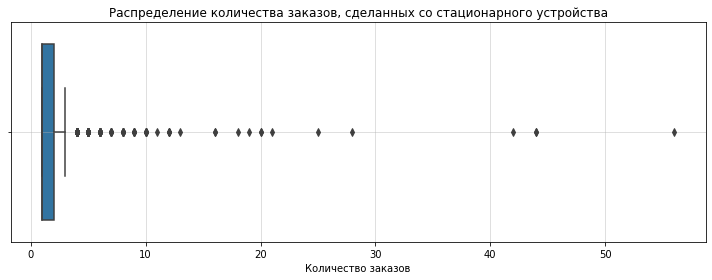

In [105]:
# Построим диаграмму размаха:
plt.figure(figsize=(10,4))
sns.boxplot(data=desktop_order_num, x='count')
plt.title('Распределение количества заказов, сделанных со стационарного устройства')
plt.xlabel('Количество заказов')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

In [106]:
desktop_order_num['count'].describe(percentiles=[0.5,0.75,0.99])

count    1620.000000
mean        1.963580
std         3.034784
min         1.000000
50%         1.000000
75%         2.000000
99%        12.000000
max        56.000000
Name: count, dtype: float64

99 перцентиль равняется 12 заказам, а максимальное количество - 56 шт. Также необходимо избавиться от выбросов в данных.

In [107]:
# Удалим выбросы:
desktop_order_num_clean = desktop_order_num[desktop_order_num['count']<desktop_order_num['count'].quantile(0.99)].copy()

После очистки сравним статистические данные по количеству заказов, оформленных с разных устройств.

In [108]:
# Выведем статистику по заказам с мобильных устройств:
mobile_order_num_clean['count'].describe()

count    10703.000000
mean         2.569560
std          2.624083
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: count, dtype: float64

In [109]:
# Выведем статистику по заказам с десктопных устройств:
desktop_order_num_clean['count'].describe()

count    1602.000000
mean        1.717228
std         1.384510
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: count, dtype: float64

In [110]:
# Вычислим разницу в количестве участвующих пользователей в тесте:
desktop_order_num_clean['user_id'].nunique()/mobile_order_num_clean['user_id'].nunique()*100

14.967766046902737

Количество данных для анализа сильно отличается. В группе мобильного приложения участвовало в 15 раз больше пользователей. Пользователи мобильных устройств наиболее активны - они в среднем совершают 2 заказа, когда как десктопные только 1 заказ.

Построим диаграммы размаха для сравнения количества заказов с разных устройств.

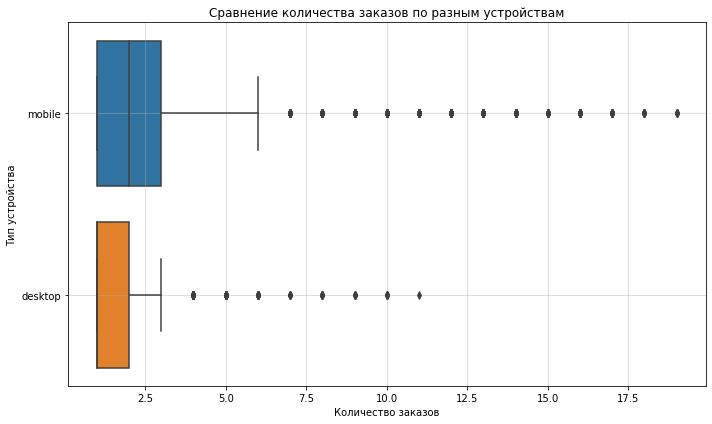

In [111]:
# Объединим датафреймы:
all_device_df = pd.concat([mobile_order_num_clean, desktop_order_num_clean])

# Построим диаграммы размаха:
plt.figure(figsize=(10, 6))

sns.boxplot(data=all_device_df, 
            orient='h',
            x='count', 
            y='device_type_canonical')
plt.title('Сравнение количества заказов по разным устройствам')
plt.xlabel('Количество заказов')
plt.ylabel('Тип устройства')

plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

У пользователей мобильных устройств намного больший разброс в данных.

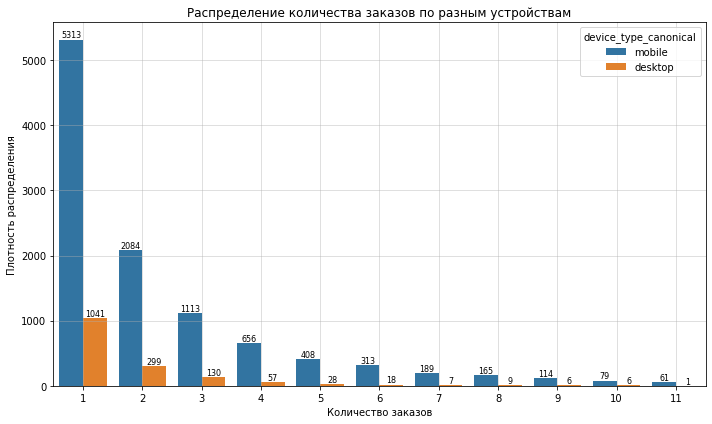

In [112]:
# Отфильтруем данные до максимального значения по десктопным устройствам:
filtered_df = all_device_df[all_device_df['count']<=max(desktop_order_num_clean['count'])]

# Построим график распределения:
plt.figure(figsize=(10, 6))

filtered_df_ax = sns.countplot(data=filtered_df,
             x='count',
             hue='device_type_canonical')

# Сделаем заголовки:
plt.title('Распределение количества заказов по разным устройствам')
plt.xlabel('Количество заказов')
plt.ylabel('Плотность распределения')

# Подписи:
for container in filtered_df_ax.containers:
    for bar in container:
        height = bar.get_height()
        filtered_df_ax.text(bar.get_x() + bar.get_width()/2,
                                         height+0.1,
                                         f'{height:.0f}',
                                         ha='center',
                                         va='bottom',
                                         fontsize=8)

plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

Распределения имеют ассиметричный вид с правым хвостом. Также можно отметить, что данных у группы мобильных пользователей намного больше. 

У обеих групп распределение ненормальное, есть выбросы.

Проведем тест Манна-Уитни, т.к. в данных присутствуют выбросы и наблюдается ассиметричное распределение данных.

In [113]:
# Уровень значимости:
alpha = 0.05

# Проведем тест Манна-Уитни:
mw_test = stats.mannwhitneyu(mobile_order_num_clean['count'],
                                                 desktop_order_num_clean['count'],
                                                 alternative='greater')

if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Распределения метрики в группах A и B равны.')
else:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Распределения метрики в группах A и B различаются.')

pvalue=5.477244414643753e-41 < 0.05
Нулевая гипотеза не находит подтверждения! Распределения метрики в группах A и B различаются.


Статистический тест показывает, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

#### Проверка второй гипотезы.

**Нулевая гипотеза** - среднее время между заказами пользователей мобильных приложений НЕ выше по сравнению с пользователями стационарных устройств.

**Альтернативная гипотеза** - среднее время между заказами пользователей мобильных приложений ВЫШЕ по сравнению с пользователями стационарных устройств.

**Проверка распределений значений**

In [114]:
# Найдем время между заказами, которые совершили пользователи:
order_time = cleaned_df.groupby(['user_id','device_type_canonical'])['days_since_prev'].mean().reset_index(name='days')

In [115]:
# Разделим датафреймы по типу девайса:
mobile_order_time = order_time[order_time['device_type_canonical']=='mobile'].copy()
desktop_order_time = order_time[order_time['device_type_canonical']=='desktop'].copy()

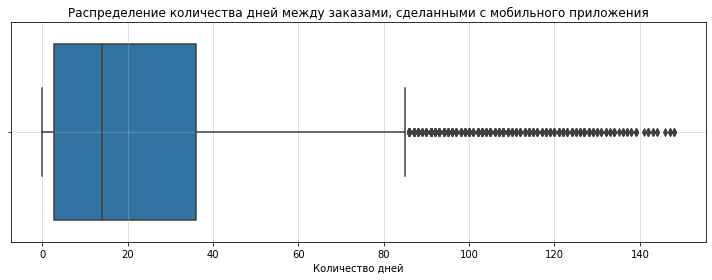

In [116]:
# Построим диаграмму размаха для пользователей мобильного приложения:
plt.figure(figsize=(10,4))
sns.boxplot(data=mobile_order_time, x='days')
plt.title('Распределение количества дней между заказами, сделанными с мобильного приложения')
plt.xlabel('Количество дней')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

In [117]:
# Выведем краткое описание статистики времени между заказами:
mobile_order_time['days'].describe(percentiles=[0.25,0.5,0.75,0.99])

count    6997.000000
mean       25.103066
std        30.148350
min         0.000000
25%         2.800000
50%        14.000000
75%        36.000000
99%       127.000000
max       148.000000
Name: days, dtype: float64

Медиана и среднее значение времени между заказами различны из-за перекоса в данных и выбросах. 99 перцентиль равняется 127 дням, а максимальное значение - 148 дней. В целом такие данные возможны, т.к. пользователи могли оформить заказ и через полгода. Но для более точного анализа отфильтруем эти данные.

In [118]:
# Удалим выбросы:
filtered_mobile_order_time = mobile_order_time[mobile_order_time['days']<mobile_order_time['days'].quantile(0.99)].copy()

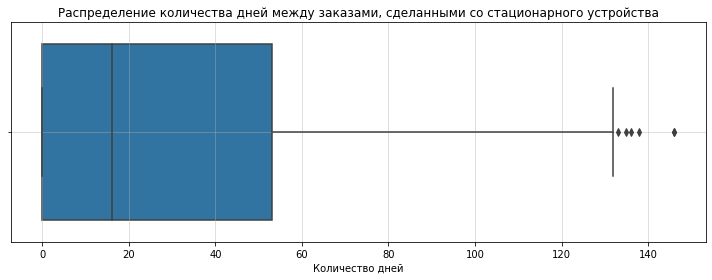

In [119]:
# Построим диаграмму размаха для пользователей десктопной версии:
plt.figure(figsize=(10,4))
sns.boxplot(data=desktop_order_time, x='days')
plt.title('Распределение количества дней между заказами, сделанными со стационарного устройства')
plt.xlabel('Количество дней')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

In [120]:
# Выведем краткое описание статистики времени между заказами:
desktop_order_time['days'].describe(percentiles=[0.25,0.5,0.75,0.99])

count    905.000000
mean      31.083252
std       36.470629
min        0.000000
25%        0.000000
50%       16.000000
75%       53.000000
99%      130.000000
max      146.000000
Name: days, dtype: float64

В данных по заказам со стационарных устройств тоже перекос: медиана равняется 16 дням, а среднее значение - 31 дню. Значения после 99 перцентиля будем считать выбросами, поэтому удалим их.

In [121]:
# Удалим выбросы:
filtered_desktop_order_time = desktop_order_time[desktop_order_time['days']<desktop_order_time['days'].quantile(0.99)].copy()

После очистки сравним статистические данные по времени между заказами, оформленными с разных устройств.

In [122]:
# Выведем статистику по времени между заказами с мобильных устройств:
filtered_mobile_order_time['days'].describe(percentiles=[0.25,0.5,0.75,0.99])

count    6926.000000
mean       23.984140
std        28.185388
min         0.000000
25%         2.666667
50%        13.666667
75%        35.000000
99%       115.750000
max       126.000000
Name: days, dtype: float64

In [123]:
# Выведем статистику по времени между заказами с десктопных устройств:
filtered_desktop_order_time['days'].describe(percentiles=[0.25,0.5,0.75,0.99])

count    893.000000
mean      29.690194
std       34.656252
min        0.000000
25%        0.000000
50%       15.333333
75%       50.000000
99%      122.080000
max      129.000000
Name: days, dtype: float64

Пользователи мобильного приложения наиболее активны (их среднее равняется 24 дням), чем пользователи десктопных версий (среднее - 30 дней). Пользователи первой группы чаще совершают повторно заказ, поэтому их среднее время между заказами меньше.

Построим диаграммы размаха для сравнения времени между заказами с разных устройств.

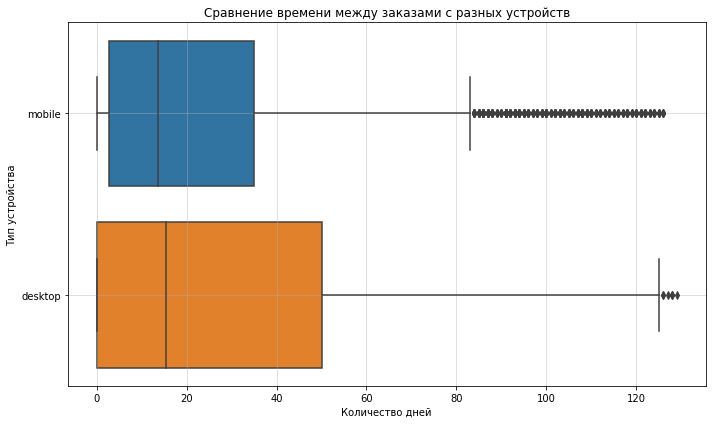

In [124]:
# Объединим датафреймы:
all_time_df = pd.concat([filtered_mobile_order_time, filtered_desktop_order_time])

# Построим диаграммы размаха:
plt.figure(figsize=(10, 6))

sns.boxplot(data=all_time_df, 
            orient='h',
            x='days', 
            y='device_type_canonical')
plt.title('Сравнение времени между заказами с разных устройств')
plt.xlabel('Количество дней')
plt.ylabel('Тип устройства')

plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

Выбросов в среднем времени между заказами наблюдается больше у данных с мобильных устройств, нежели с десктопных. Но также можно отметить, что разброс значений выше у десктопных данных.

In [125]:
# Вычисляем квартили Q1 и Q3
Q1 = filtered_mobile_order_time['days'].quantile(0.25)
Q3 = filtered_mobile_order_time['days'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний порог для выбросов
mobile_upper_bound = Q3 + 1.5 * IQR
print(mobile_upper_bound)

83.5


In [126]:
# Вычисляем квартили Q1 и Q3
Q1 = filtered_desktop_order_time['days'].quantile(0.25)
Q3 = filtered_desktop_order_time['days'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний порог для выбросов
desktop_upper_bound = Q3 + 1.5 * IQR
print(desktop_upper_bound)

125.0


In [127]:
# Найдем разницу между верхними порогами для выбросов обоих типов устройств:
desktop_upper_bound-mobile_upper_bound

41.5

Верхняя граница выбросов у десктопных устройств выше на 41.5 дней. Также выше и 75 перцентиль - у заказов с мобильных устройств средний период между заказами составляет 35 дней, у десктопных - 50. 

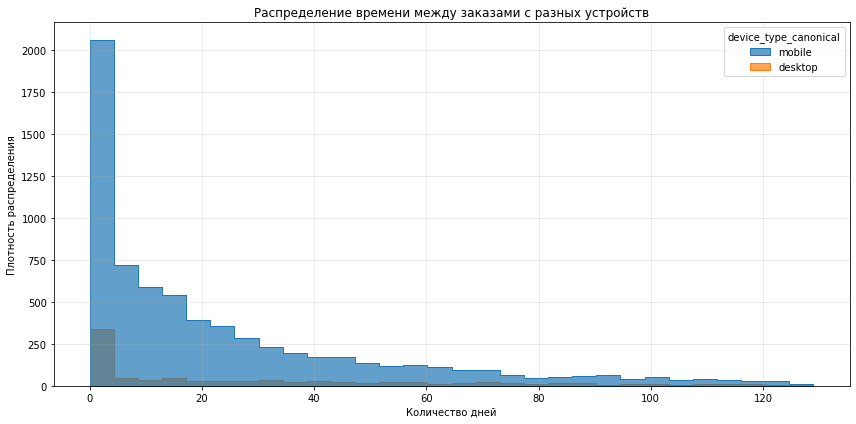

In [128]:
plt.figure(figsize=(12, 6))
sns.histplot(data=all_time_df, 
             x='days', 
             hue='device_type_canonical',
             bins=30,
             alpha=0.7,
             element='step')

plt.title('Распределение времени между заказами с разных устройств')
plt.xlabel('Количество дней')
plt.ylabel('Плотность распределения')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Большинство пользователей обоих типов устройств чаще всего не совершают повторно заказ, т.к. большая плотность распределения наблюдается на "нулевом" дне.

Проведем тест Манна-Уитни, т.к. в данных присутствуют выбросы и наблюдается ассиметричное распределение данных.

In [130]:
# Преобразуем тип данных в float:
mobile_array = filtered_mobile_order_time['days'].astype('float64')
desktop_array = filtered_desktop_order_time['days'].astype('float64')

# Проведем тест Манна-Уитни:
mw_test = stats.mannwhitneyu(mobile_array,
                             desktop_array,
                             alternative='greater')

if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Распределения метрики в группах A и B равны.')
else:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Распределения метрики в группах A и B различаются.')

pvalue=0.7241441102372259 > 0.05
Нулевая гипотеза находит подтверждение! Распределения метрики в группах A и B равны.


Статистический тест показывает, что среднее время между заказами пользователей мобильных приложений не выше по сравнению с заказами со стационарных устройств.

---
### Промежуточный вывод

В результате статистического анализа данных можно сделать следующие выводы:
- Гипотезы относительно активности пользователей мобильных и стационарных устройств нашли подтверждение:
   - Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств. Пользователи мобильных устройств наиболее активны - они в среднем совершают 2 заказа, когда как десктопные только 1 заказ.
   - Среднее время между заказами пользователей мобильных приложений не выше по сравнению с заказами со стационарных устройств. Пользователи мобильных устройств в среднем совершают заказы каждые 16 дня, когда как десктопная группа - каждые 31 дней.

---

### Общий вывод и рекомендации

**Информация о данных**

В ходе исследования проанализированы данные о 13218 заказах билетов через сервис Яндекс Афиша за период с июня по ноябрь 2024 года. Данные включали информацию о заказах, пользователях, мероприятиях и билетных партнерах.

***Ключевые результаты анализа***

1. Сезонные изменения спроса:
- Наблюдается значительный рост активности пользователей осенью 2024 года (+25% по сравнению с летом).
- Осенью вырос спрос на спортивные мероприятия (+8.7%), театры (+4.6%) и елки (+0.8%).
- Увеличилась доля пользователей десктопной версии сервиса.
- Выросла популярность мероприятий с возрастным рейтингом 0+ (+5.3%) и 12+ (+1%).

2. Изменение ценовой политики:
- Средняя выручка с билета на стендап выросла на 5.7%, на выставки — на 6%.
- В выходные дни средняя цена билета выше на 5-6% по сравнению с буднями.
- Наибольшая активность покупок отмечается в будние дни, особенно по вторникам и четвергам.

3. Географическое распределение:
- Каменевский регион (24.7% мероприятий) и Североярская область (16.4%) — лидеры по количеству мероприятий и заказов.
- На эти два региона приходится 40% всех заказов сервиса.

4. Эффективность билетных партнеров:
- "Билеты без проблем" — абсолютный лидер по выручке (16.1%) и количеству заказов (19%).
- "Лови билет!" провел наибольшее количество мероприятий (20.8%).
- Топ-3 партнера зарабатывают более 50% общей выручки.

5. Поведение пользователей:
- Подтверждена статистически значимая разница в активности пользователей разных устройств.
- Мобильные пользователи совершают в 2 раза больше заказов (2 vs 1).

**Результаты проверки гипотез**

- Первая гипотеза подтвердилась: мобильные пользователи в среднем совершают больше заказов.
- Вторая гипотеза не подтвердилась: среднее время между заказами у мобильных пользователей не выше, чем у десктопных.

**Рекомендации для сервиса**
- Усилить мобильное направление — инвестировать в развитие мобильного приложения, так как эта аудитория показывает наибольшую активность.
- Сезонное планирование — увеличивать предложение спортивных мероприятий и театров в осенний период.
- Фокус на ключевых партнеров — усилить сотрудничество с "Билетами без проблем" и "Лови билет!".
- Региональная стратегия — развивать позиции в Каменевском регионе и Североярской области.

Данное исследование демонстрирует значительный потенциал роста сервиса через оптимизацию предложения под сезонные предпочтения пользователей и фокус на наиболее эффективные каналы и партнеров.